
#Upload the File in Google Colab

In [ ]:
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Exploratory Data Analysis

   Age Gender        Country family_history treatment work_interfere  \
0   46   Male  United States            Yes        No      Sometimes   
1   36   Male         France            Yes        No            NaN   
2   29   Male  United States            Yes       Yes      Sometimes   
3   31   Male  United States             No        No          Never   
4   46   Male  United States             No       Yes          Often   

  self_employed remote_work    no_employees tech_company  ...   anonymity  \
0           Yes         Yes  More than 1000          Yes  ...         Yes   
1           Yes         Yes  More than 1000          Yes  ...         Yes   
2            No          No         100-500          Yes  ...          No   
3           Yes         Yes  More than 1000          Yes  ...         Yes   
4            No         Yes          26-100          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0           Very easy        

<ipython-input-21-287e7d0d0375>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-21-287e7d0d0375>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], ax=axes[i], palette='Set2')
<ipython-input-21-287e7d0d0375>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-21-287e7d0d0375>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], ax=axes[i], palette='Set2')
<ipython-input-21-287e7d0d0375>:31: UserWarning: FixedFormatter 

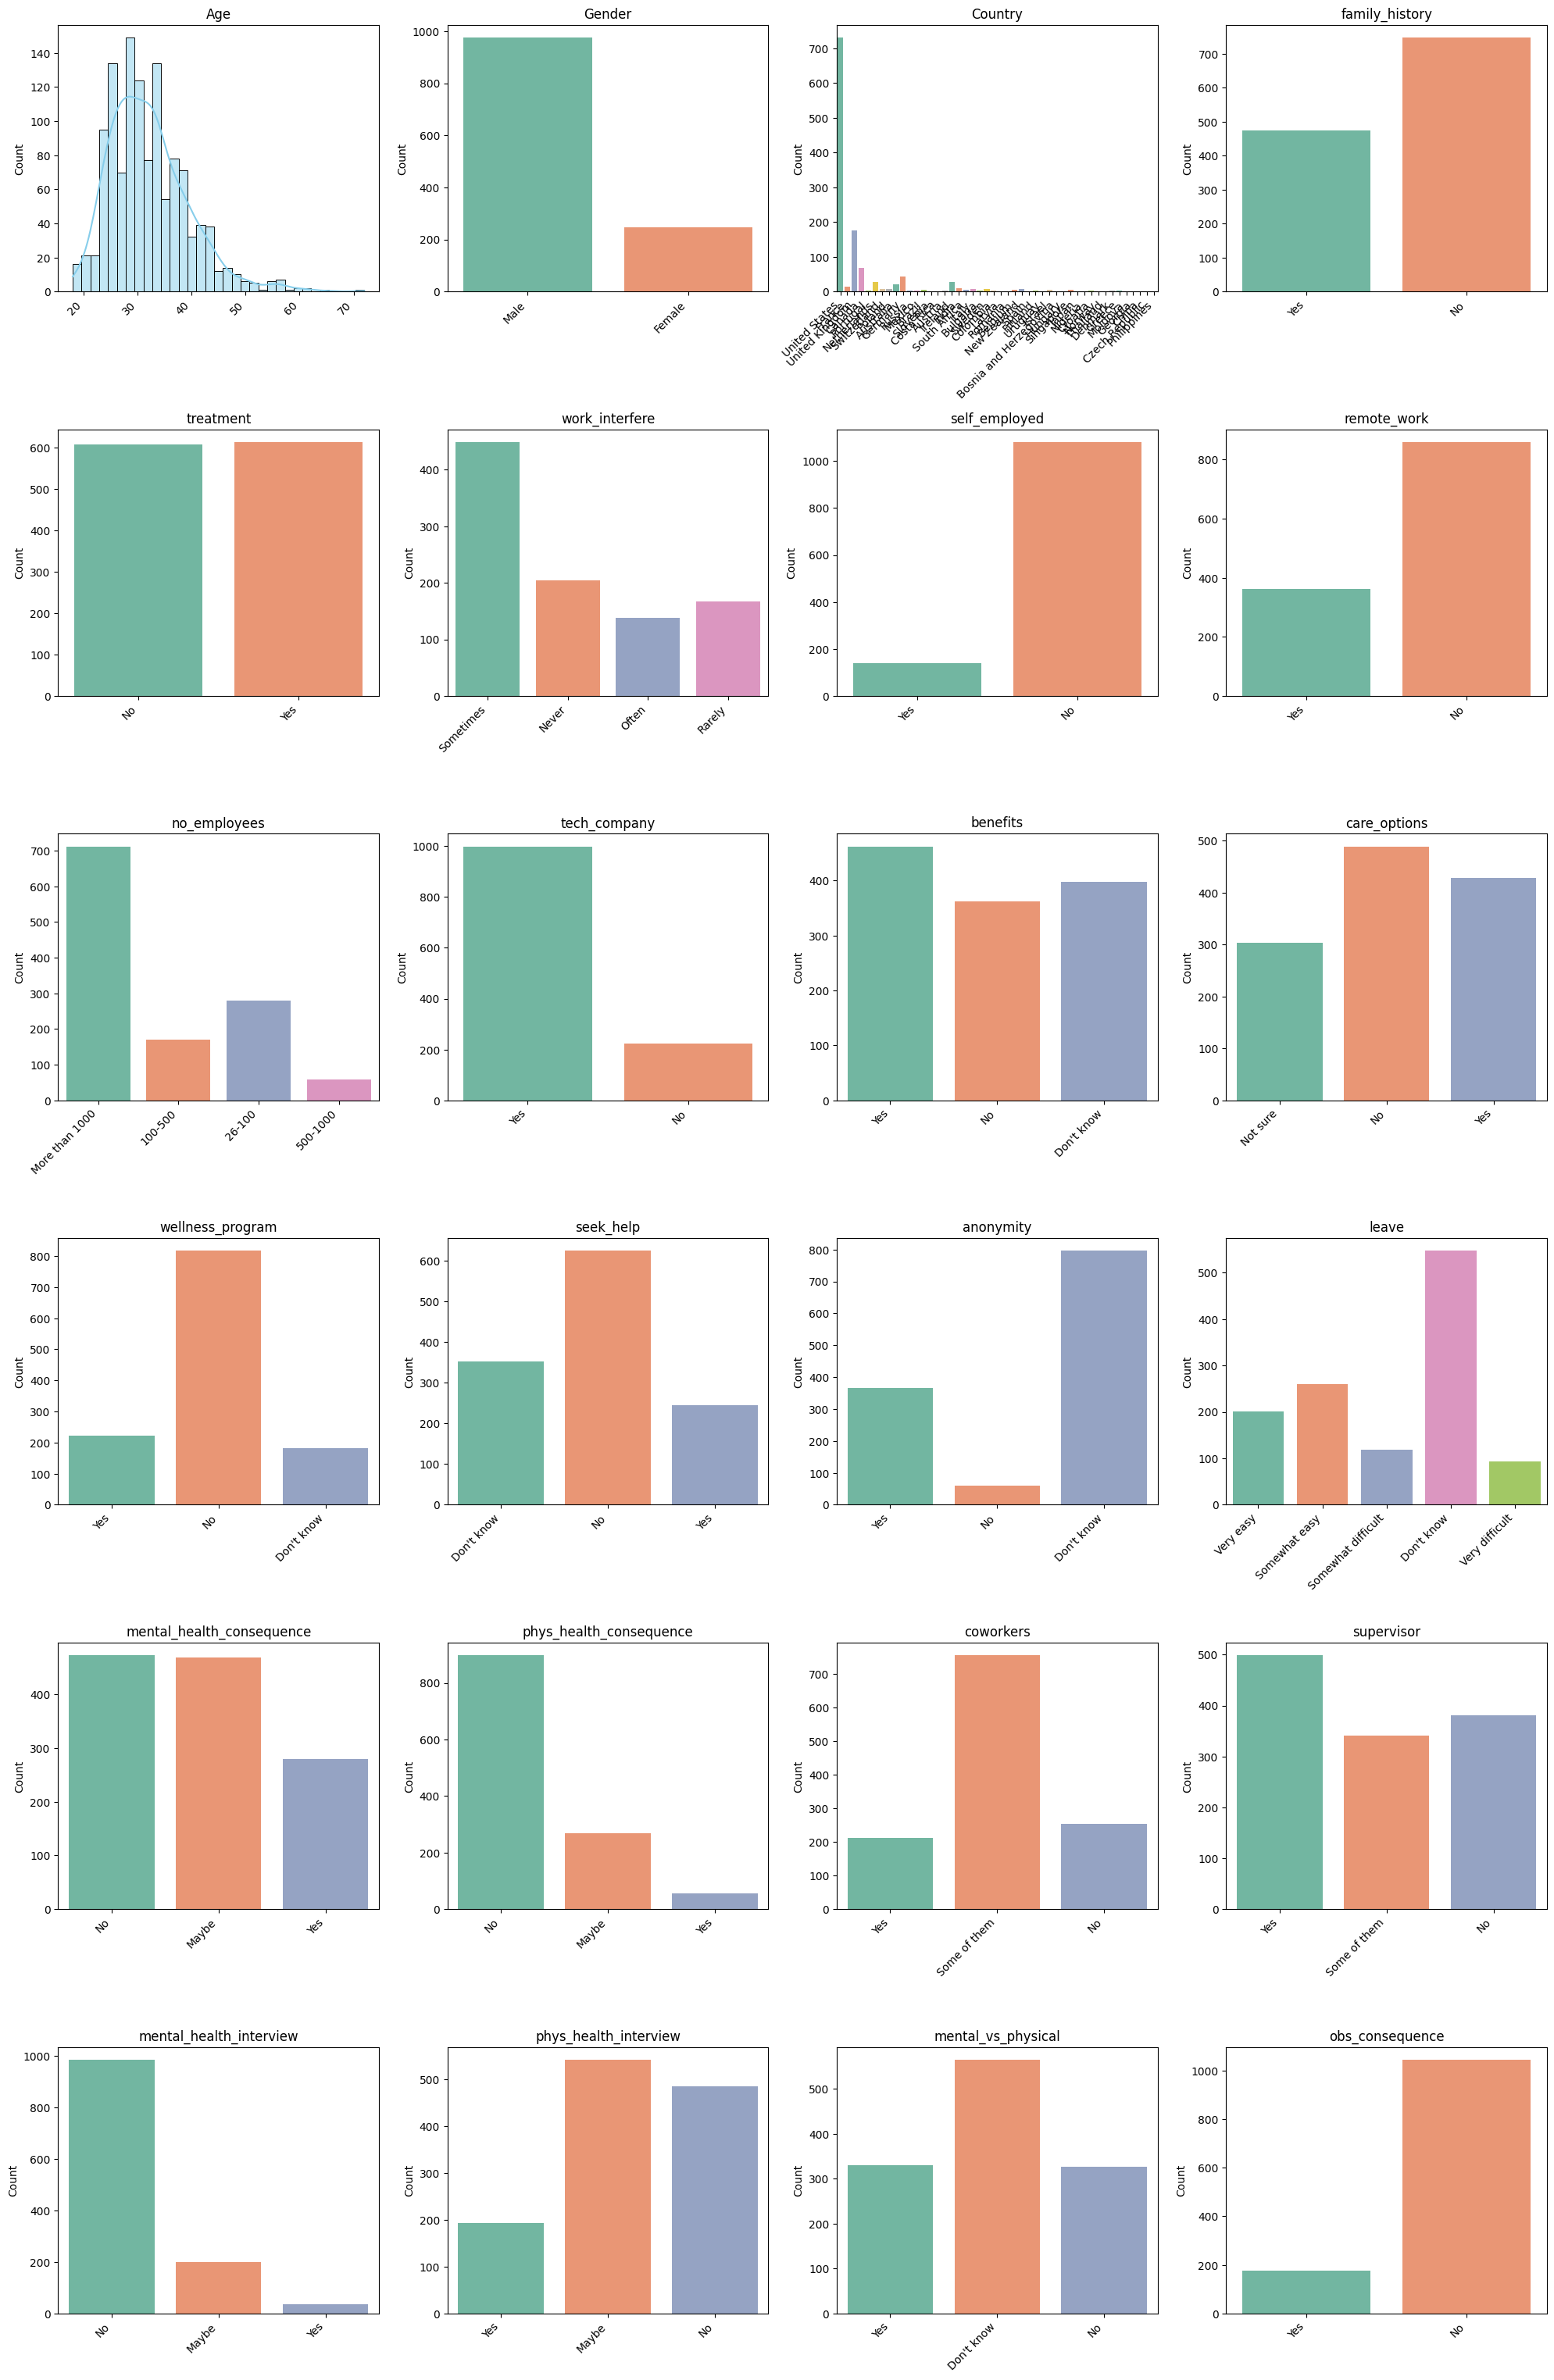

<ipython-input-21-287e7d0d0375>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[data['Country'].isin(top_countries)]['Country'], palette='Set2')


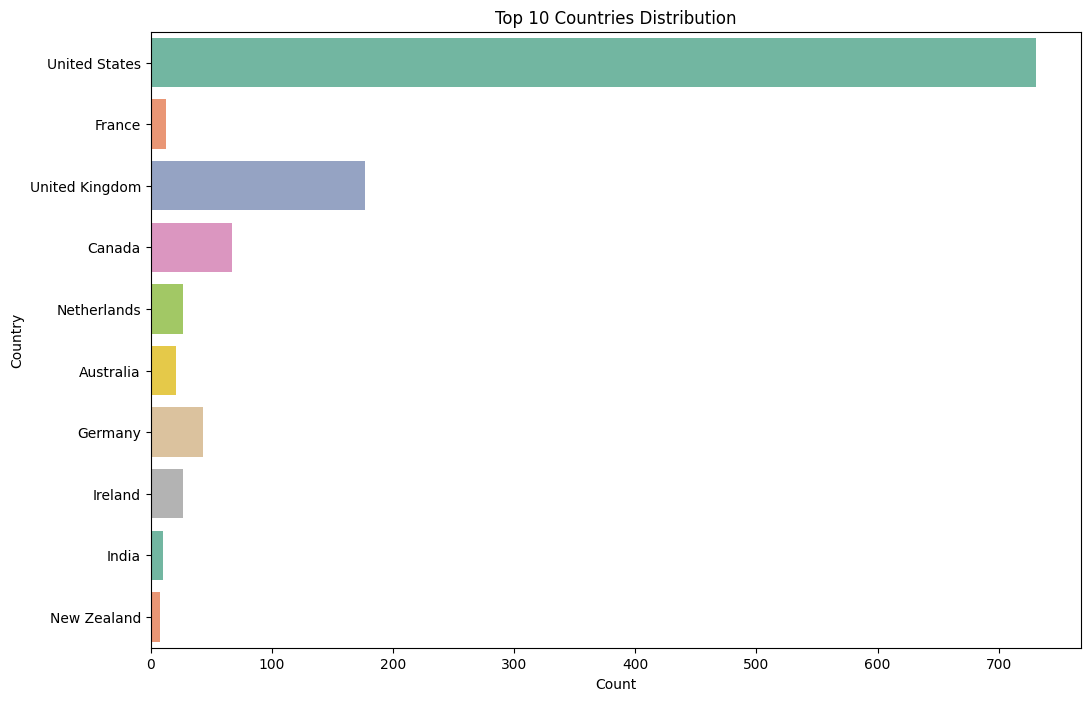

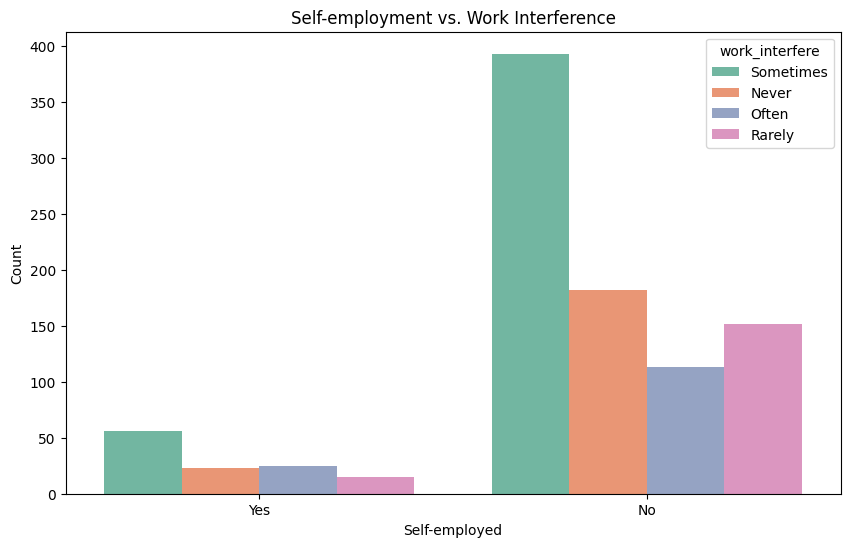

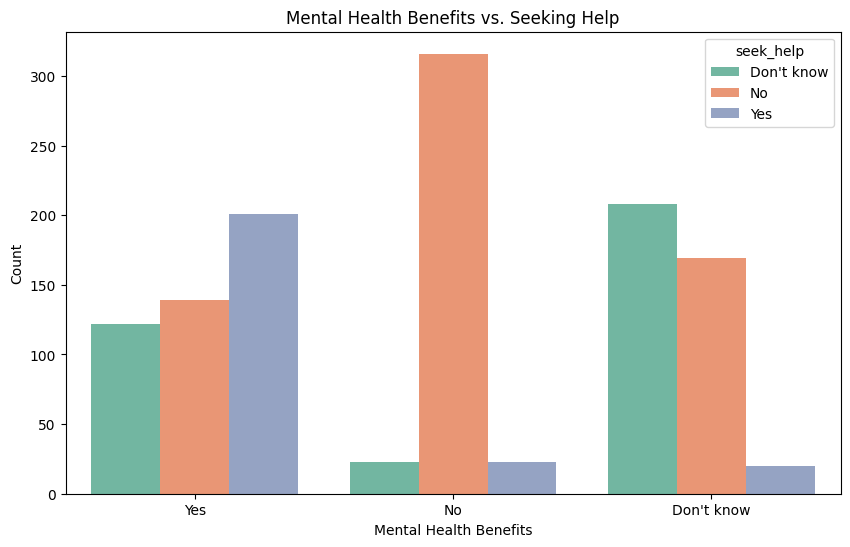

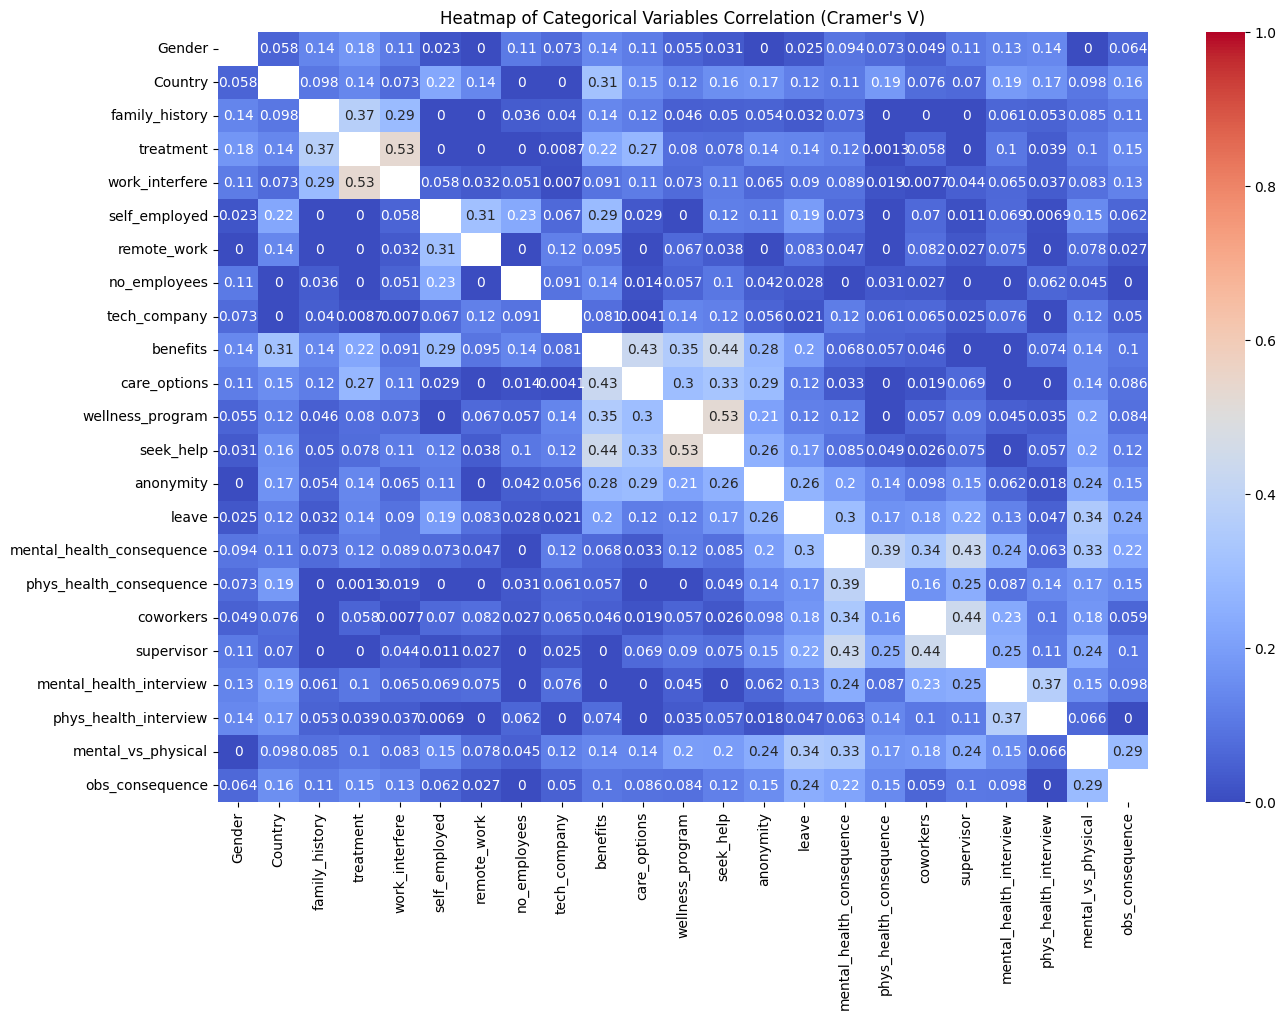

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Mental Health Trend/cleaned_survey.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display the column names to check for any issues
print("Column Names:", data.columns)

# Exploratory Data Analysis (EDA)
# Distribution of responses for each column
num_columns = len(data.columns)
num_rows = (num_columns // 4) + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    if data[column].dtype == 'object' or len(data[column].unique()) < 10:
        sns.countplot(x=data[column], ax=axes[i], palette='Set2')
    else:
        sns.histplot(data[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Gender distribution if 'gender' column is present
if 'gender' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data['gender'], palette='Set2')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

# Country distribution (Top 10 countries) if 'Country' column is present
if 'Country' in data.columns:
    plt.figure(figsize=(12, 8))
    top_countries = data['Country'].value_counts().nlargest(10).index
    sns.countplot(y=data[data['Country'].isin(top_countries)]['Country'], palette='Set2')
    plt.title('Top 10 Countries Distribution')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.show()

# Relationships between categorical variables
# Example: Self-employment vs. Work Interference if both columns are present
if 'self_employed' in data.columns and 'work_interfere' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='self_employed', hue='work_interfere', data=data, palette='Set2')
    plt.title('Self-employment vs. Work Interference')
    plt.xlabel('Self-employed')
    plt.ylabel('Count')
    plt.show()

# Example: Mental Health Benefits vs. Seeking Help if both columns are present
if 'benefits' in data.columns and 'seek_help' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='benefits', hue='seek_help', data=data, palette='Set2')
    plt.title('Mental Health Benefits vs. Seeking Help')
    plt.xlabel('Mental Health Benefits')
    plt.ylabel('Count')
    plt.show()

# Example: Gender vs. Treatment if both columns are present
if 'gender' in data.columns and 'treatment' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='gender', hue='treatment', data=data, palette='Set2')
    plt.title('Gender vs. Treatment')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

# Heatmap of correlations between categorical variables (using Cramer's V)
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for each pair of categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

plt.figure(figsize=(15, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Heatmap of Categorical Variables Correlation (Cramer\'s V)')
plt.show()


## Demographic

Column Names: Index(['Age', 'Gender', 'Country', 'family_history', 'treatment',
       'work_interfere', 'self_employed', 'remote_work', 'no_employees',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


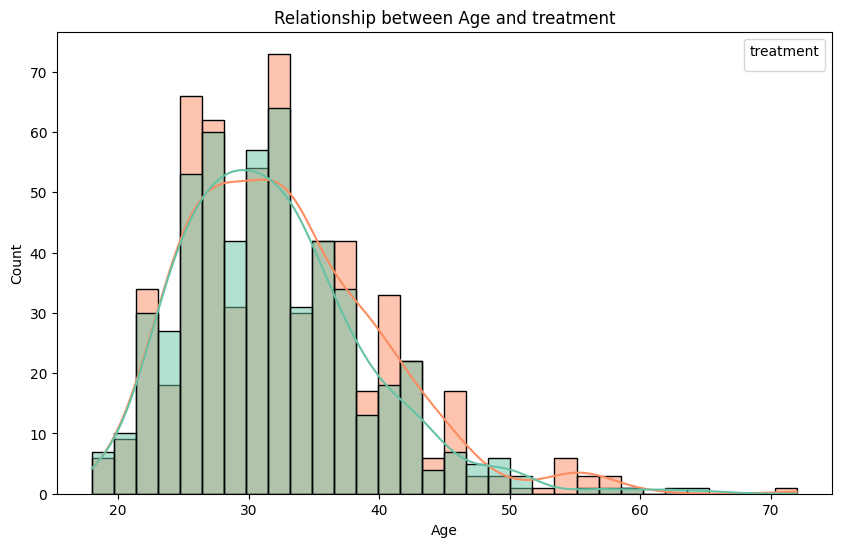

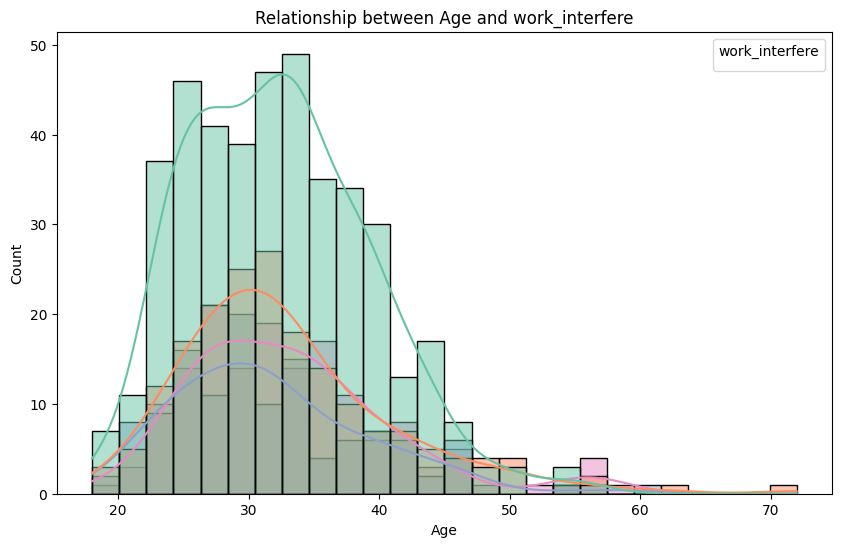

Chi-square test for Gender and treatment
Chi2: 35.17977721574272, p-value: 3.006292294799283e-09




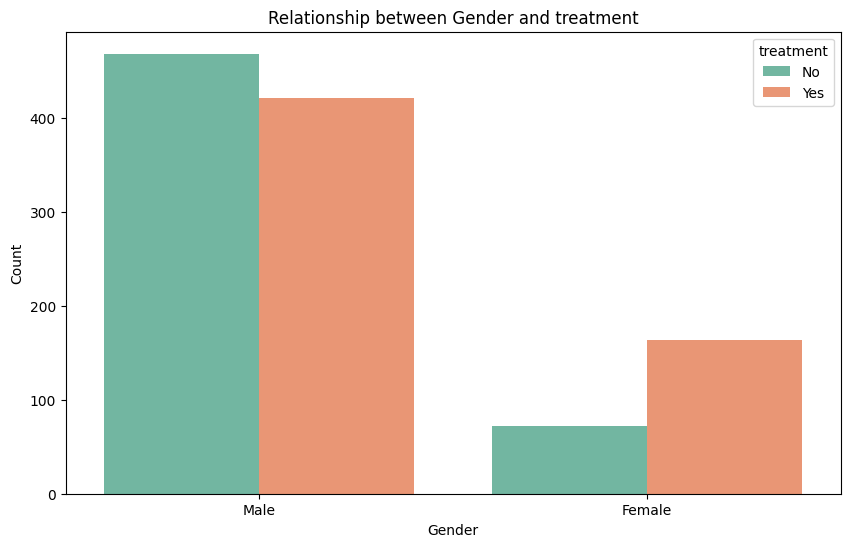

Chi-square test for Gender and work_interfere
Chi2: 13.967872481856382, p-value: 0.0029492115846069668




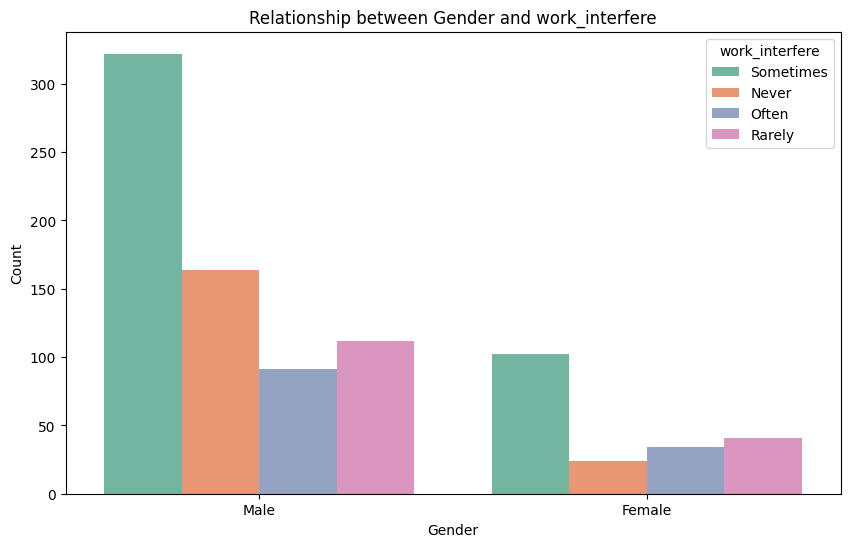

Chi-square test for Country and treatment
Chi2: 18.233131570634363, p-value: 0.03256313846821809




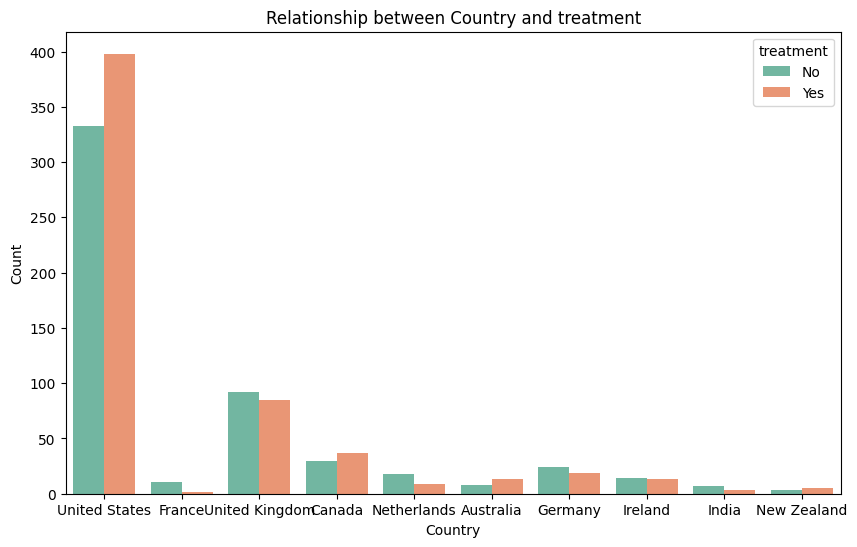

Chi-square test for Country and work_interfere
Chi2: 21.32470650896996, p-value: 0.7708493271629728




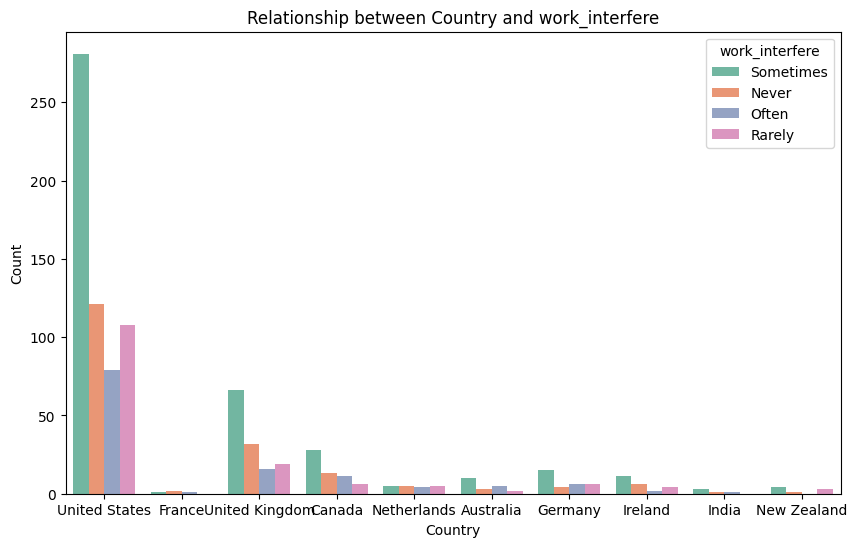

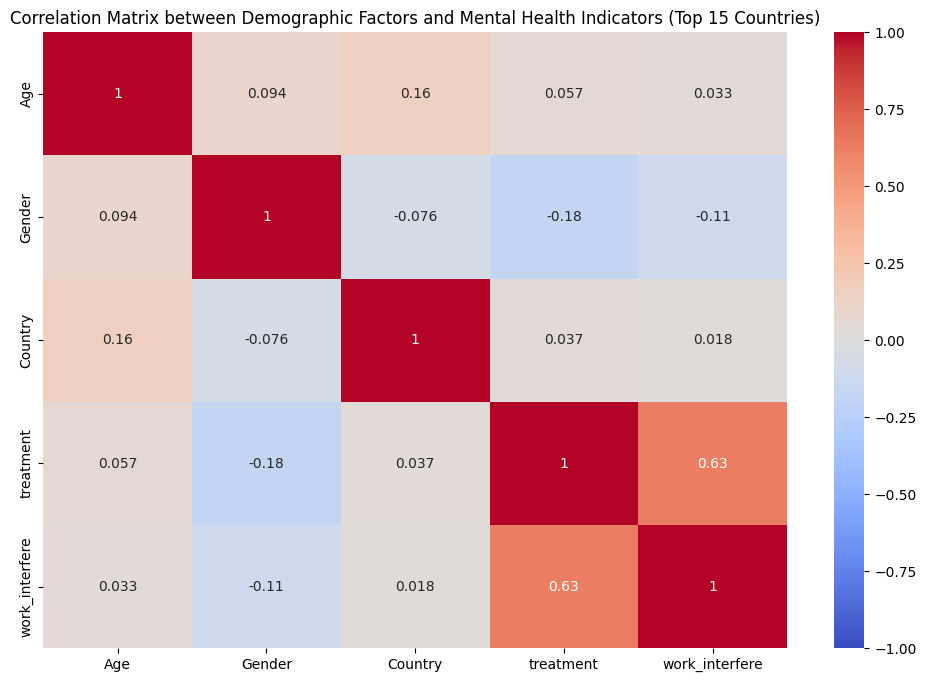

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/content/drive/MyDrive/Mental Health Trend/cleaned_survey.csv'
data = pd.read_csv(file_path)

# Display the column names to check for any issues
print("Column Names:", data.columns)

# Filter to include only the top 15 countries by number of responses
top_countries = data['Country'].value_counts().nlargest(10).index
data_top_countries = data[data['Country'].isin(top_countries)]

# Factors to analyze
demographic_factors = ['Age', 'Gender', 'Country']

# Mental health indicators
mental_health_indicators = ['treatment', 'work_interfere']

# Analyze the relationship between demographic factors and mental health indicators
for factor in demographic_factors:
    for indicator in mental_health_indicators:
        if factor in data_top_countries.columns and indicator in data_top_countries.columns:
            if data_top_countries[factor].dtype == 'object' or len(data_top_countries[factor].unique()) < 10:
                contingency_table = pd.crosstab(data_top_countries[factor], data_top_countries[indicator])
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                print(f"Chi-square test for {factor} and {indicator}")
                print(f"Chi2: {chi2}, p-value: {p}")
                print("\n")
                plt.figure(figsize=(10, 6))
                sns.countplot(x=factor, hue=indicator, data=data_top_countries, palette='Set2')
                plt.title(f'Relationship between {factor} and {indicator}')
                plt.xlabel(factor)
                plt.ylabel('Count')
                plt.legend(title=indicator)
                plt.show()
            else:
                plt.figure(figsize=(10, 6))
                sns.histplot(data=data_top_countries, x=factor, hue=indicator, kde=True, palette='Set2')
                plt.title(f'Relationship between {factor} and {indicator}')
                plt.xlabel(factor)
                plt.ylabel('Count')
                plt.legend(title=indicator)
                plt.show()

# Check which columns are present in the data
available_columns = [col for col in demographic_factors + mental_health_indicators if col in data_top_countries.columns]

# Encode categorical variables for correlation heatmap
encoded_data = data_top_countries.copy()
for col in available_columns:
    if col in data_top_countries.columns and data_top_countries[col].dtype == 'object':
        encoded_data[col] = data_top_countries[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = encoded_data[available_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Demographic Factors and Mental Health Indicators (Top 15 Countries)')
plt.show()


# Work Environment

Chi-square test for self_employed and treatment
Chi2: 0.15809905926878703, p-value: 0.6909127308069671




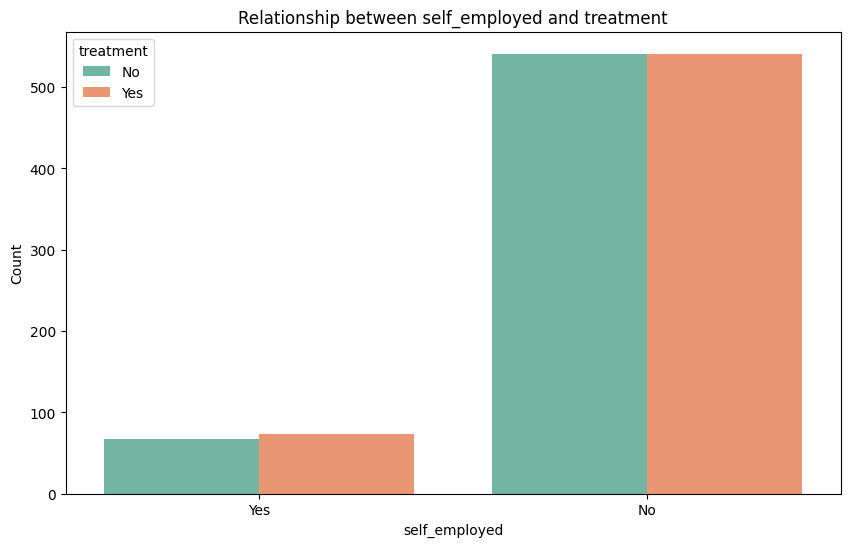

Chi-square test for self_employed and work_interfere
Chi2: 6.20817008500117, p-value: 0.10191004092277073




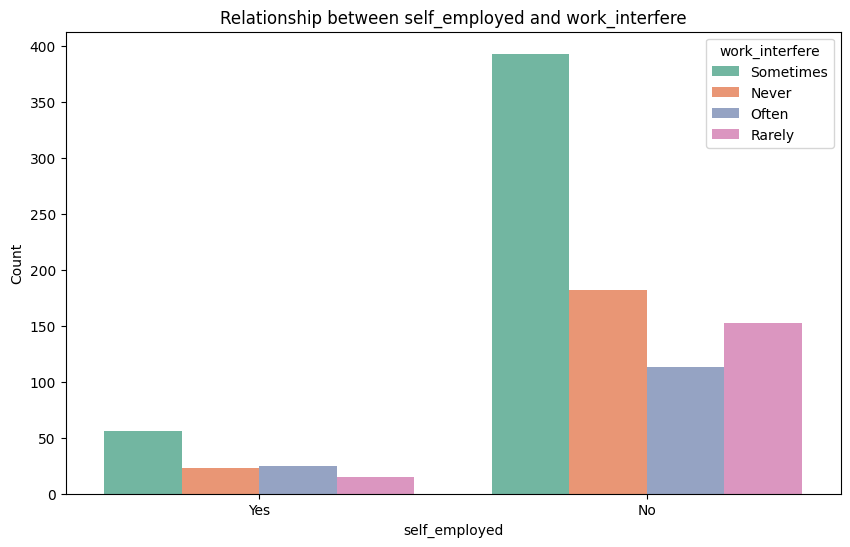

Chi-square test for remote_work and treatment
Chi2: 0.9455201634059951, p-value: 0.3308622286253586




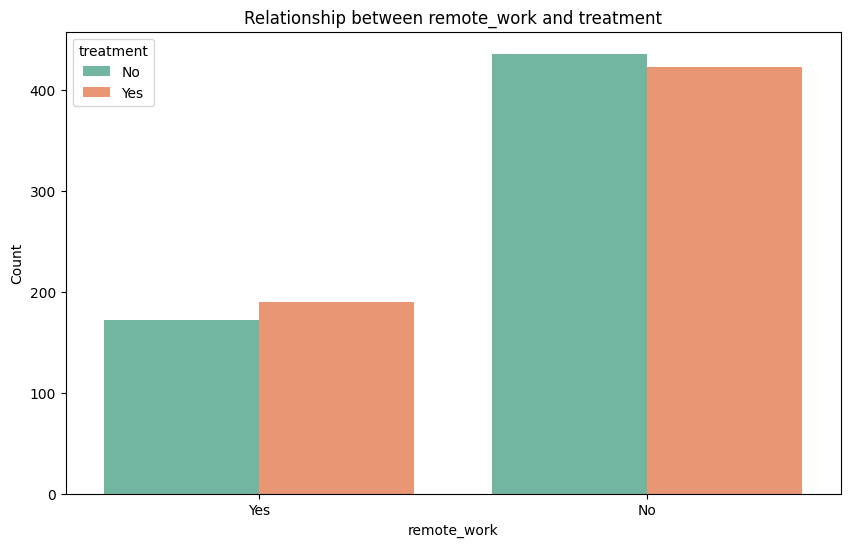

Chi-square test for remote_work and work_interfere
Chi2: 4.009186535042164, p-value: 0.2604738572721867




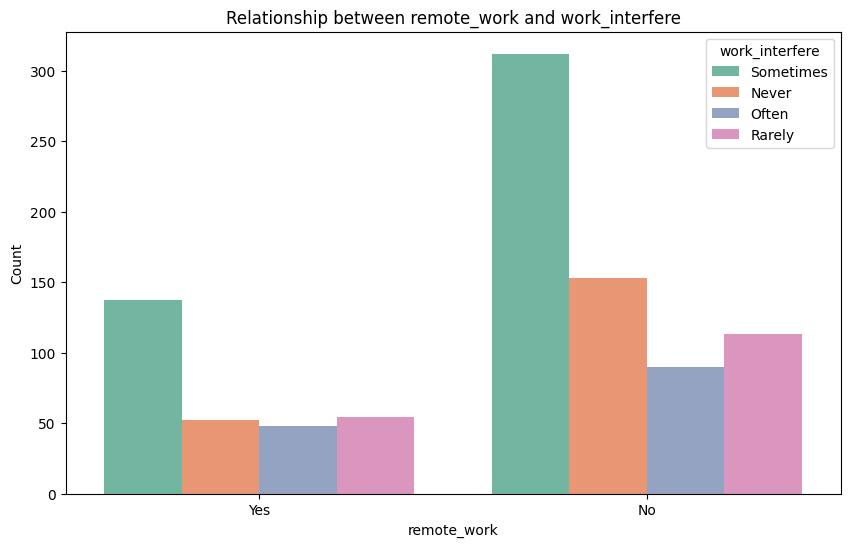

Chi-square test for no_employees and treatment
Chi2: 1.8252464439930298, p-value: 0.6094564978722827




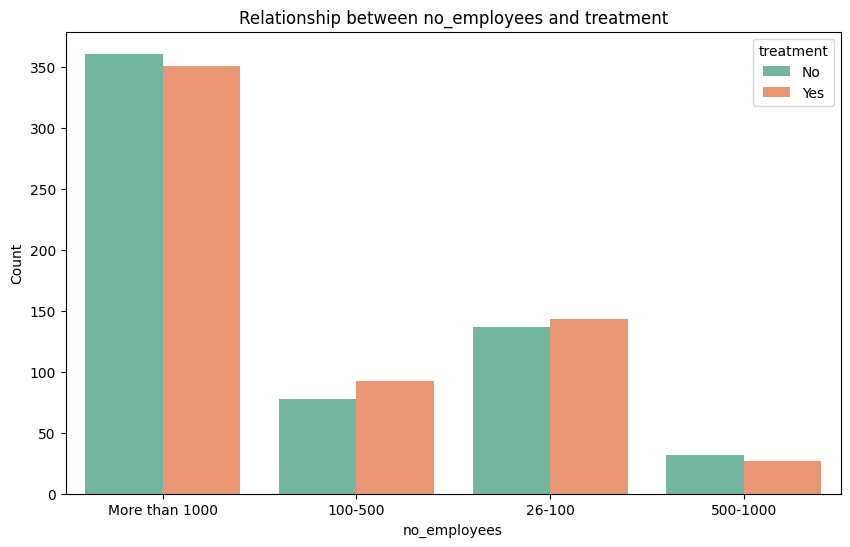

Chi-square test for no_employees and work_interfere
Chi2: 16.437152339399034, p-value: 0.05829516514791215




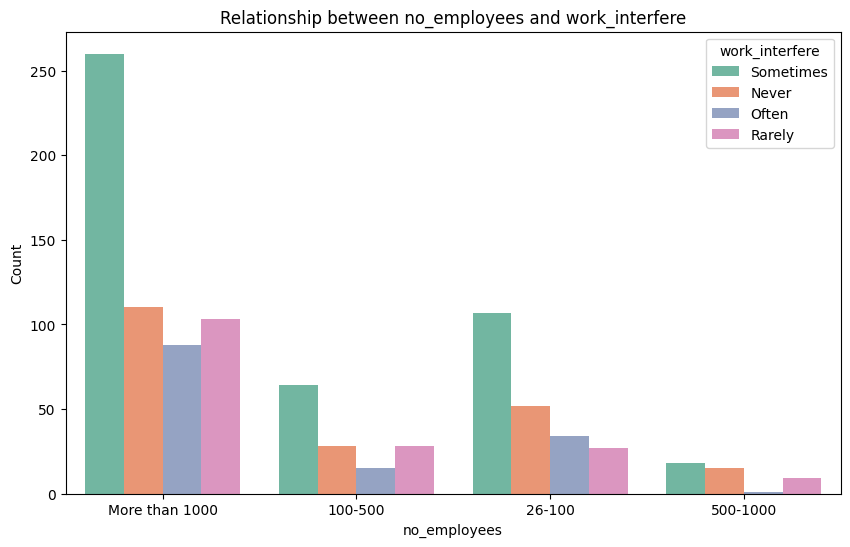

Chi-square test for tech_company and treatment
Chi2: 1.09315692435105, p-value: 0.2957727935569674




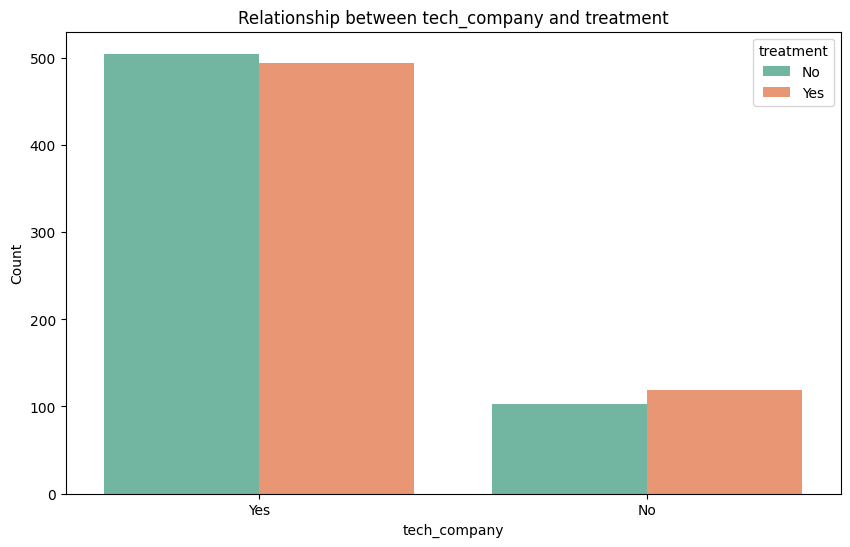

Chi-square test for tech_company and work_interfere
Chi2: 3.0504091684951646, p-value: 0.38391818645370396




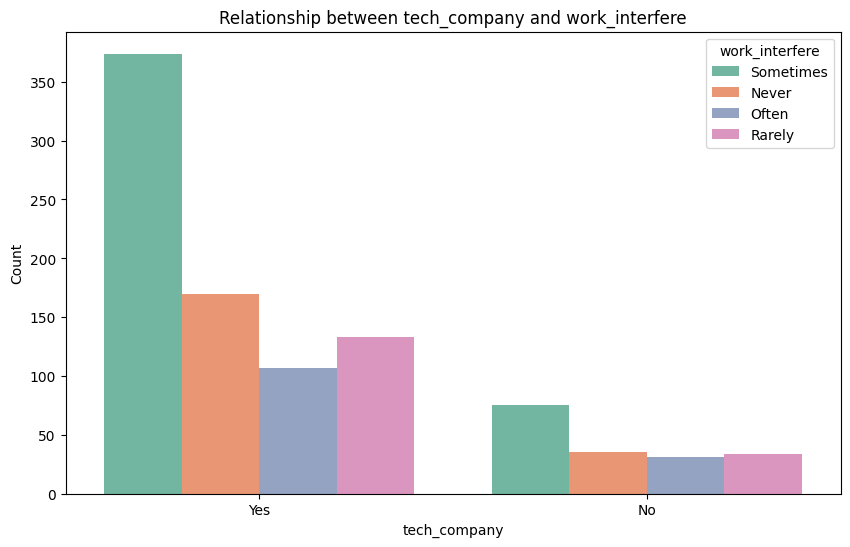

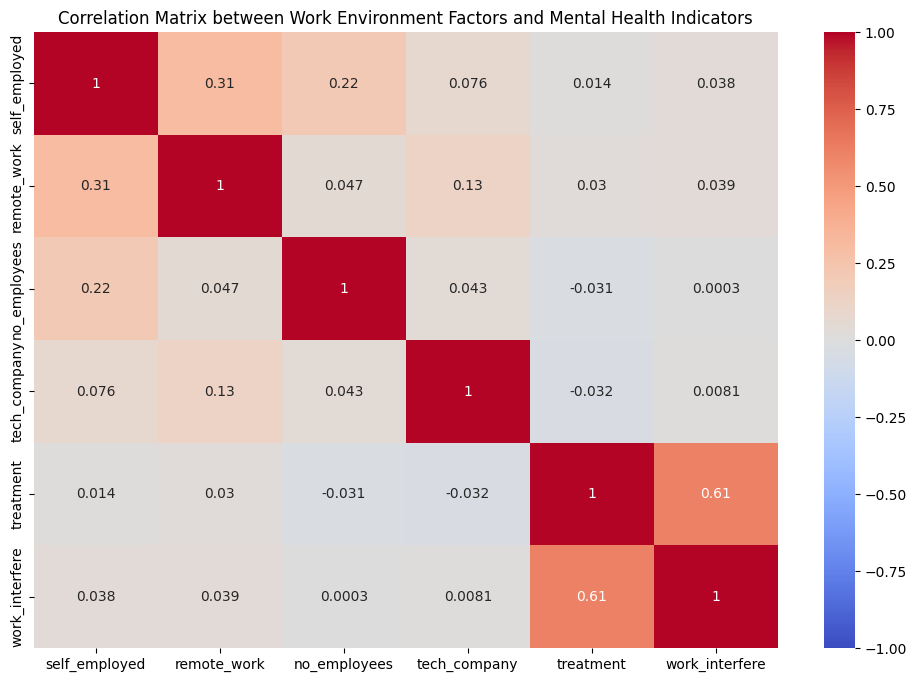

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Factors to analyze
work_environment_factors = [
    'self_employed', 'remote_work', 'no_employees', 'tech_company'
]

# Mental health indicators
mental_health_indicators = ['treatment', 'work_interfere']

# Analyze the relationship between work environment factors and mental health indicators
for factor in work_environment_factors:
    for indicator in mental_health_indicators:
        if factor in data.columns and indicator in data.columns:
            contingency_table = pd.crosstab(data[factor], data[indicator])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f"Chi-square test for {factor} and {indicator}")
            print(f"Chi2: {chi2}, p-value: {p}")
            print("\n")

            plt.figure(figsize=(10, 6))
            sns.countplot(x=factor, hue=indicator, data=data, palette='Set2')
            plt.title(f'Relationship between {factor} and {indicator}')
            plt.xlabel(factor)
            plt.ylabel('Count')
            plt.legend(title=indicator)
            plt.show()

# Heatmap to visualize correlations between work environment factors and mental health indicators
# Encode categorical variables for correlation heatmap
encoded_data = data.copy()
for col in work_environment_factors + mental_health_indicators:
    if col in data.columns and data[col].dtype == 'object':
        encoded_data[col] = data[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = encoded_data[work_environment_factors + mental_health_indicators].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Work Environment Factors and Mental Health Indicators')
plt.show()


# Support Structure

Chi-square test for benefits and treatment
Chi2: 62.8221779888067, p-value: 2.282114230818456e-14




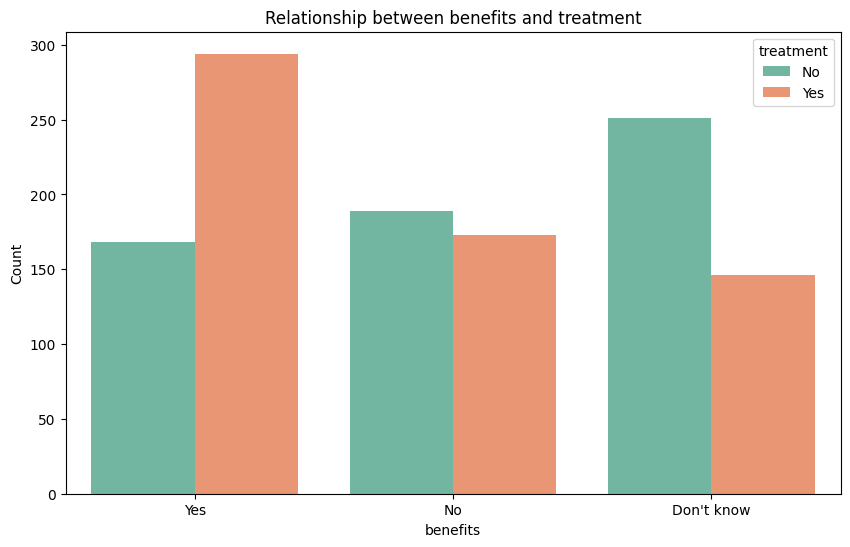

Chi-square test for benefits and work_interfere
Chi2: 22.007170566623927, p-value: 0.0012072558558436004




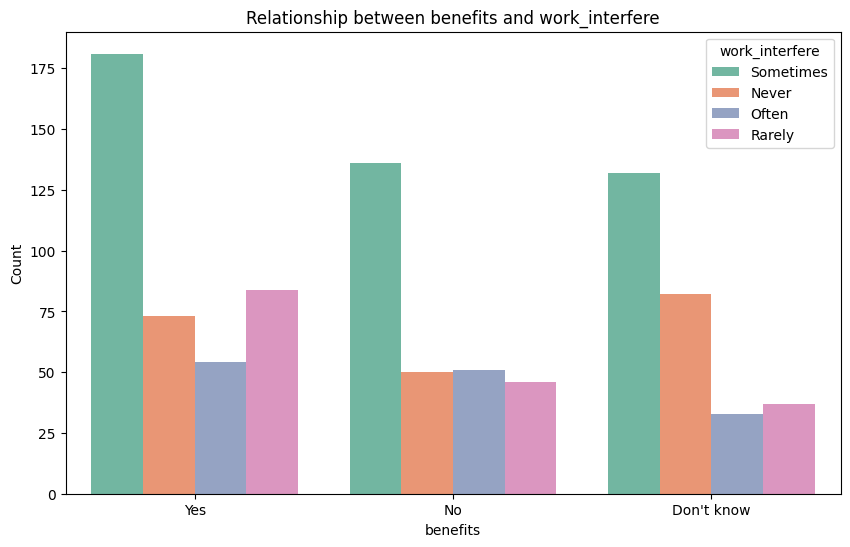

Chi-square test for care_options and treatment
Chi2: 93.82473455970072, p-value: 4.2288059548173194e-21




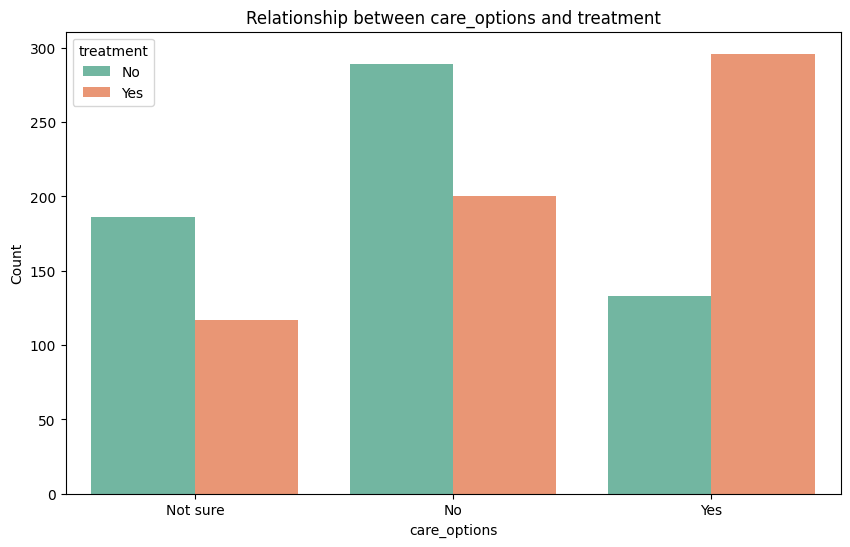

Chi-square test for care_options and work_interfere
Chi2: 29.9388117367566, p-value: 4.037539600384449e-05




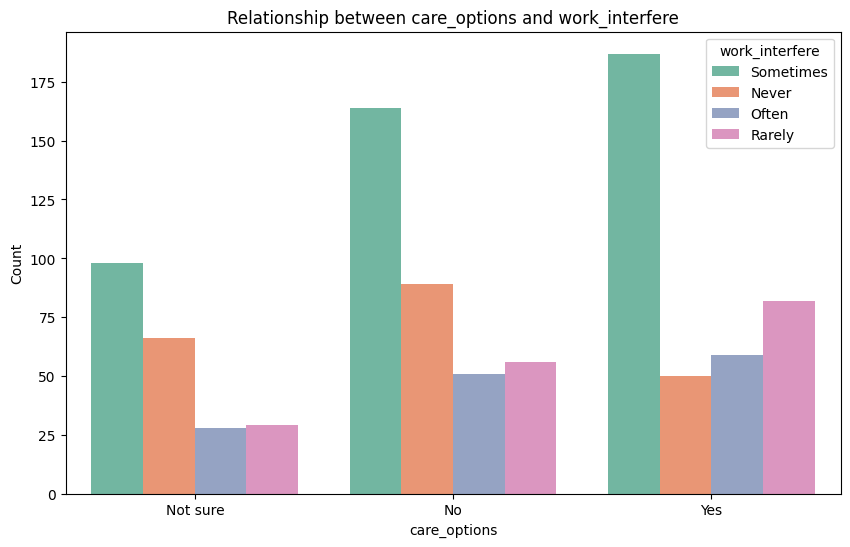

Chi-square test for wellness_program and treatment
Chi2: 9.871073059696675, p-value: 0.007186604083729025




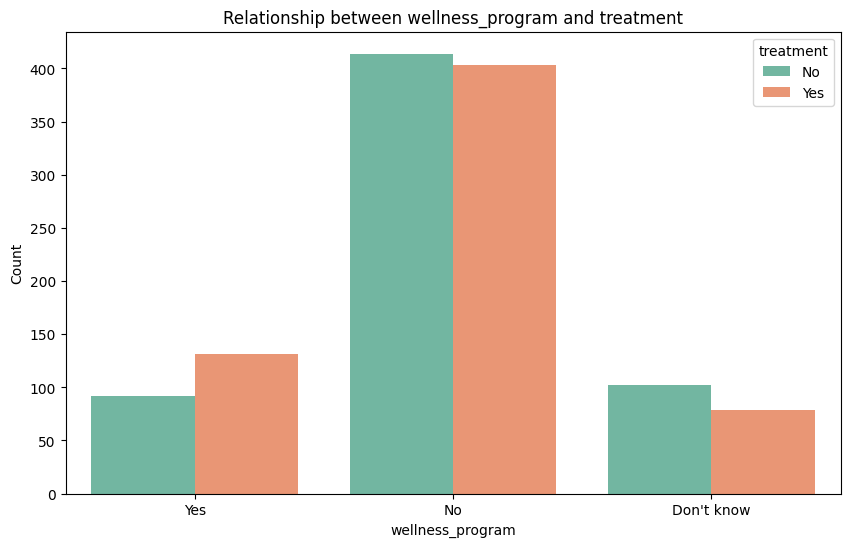

Chi-square test for wellness_program and work_interfere
Chi2: 16.24360600122145, p-value: 0.012504475180420959




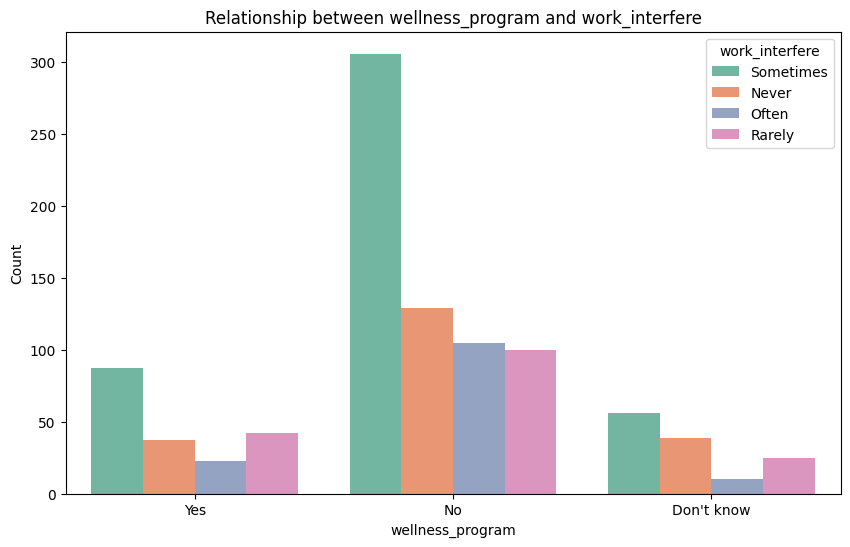

Chi-square test for seek_help and treatment
Chi2: 9.434603603288252, p-value: 0.00893926595022164




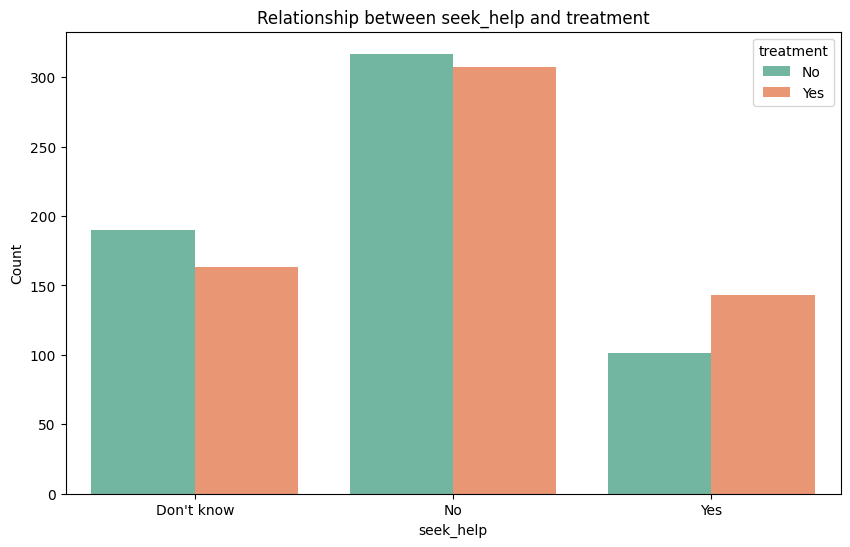

Chi-square test for seek_help and work_interfere
Chi2: 28.98347004522049, p-value: 6.127670693175418e-05




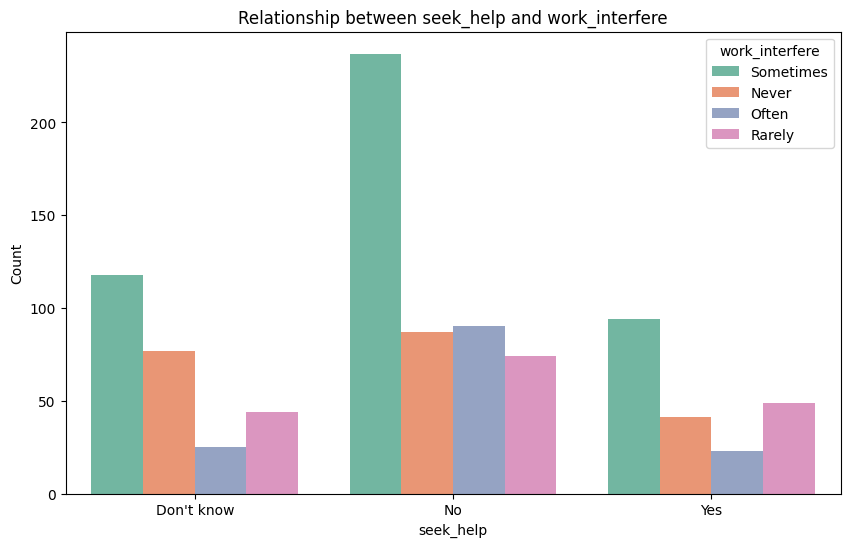

Chi-square test for anonymity and treatment
Chi2: 25.71878740138788, p-value: 2.601574548408888e-06




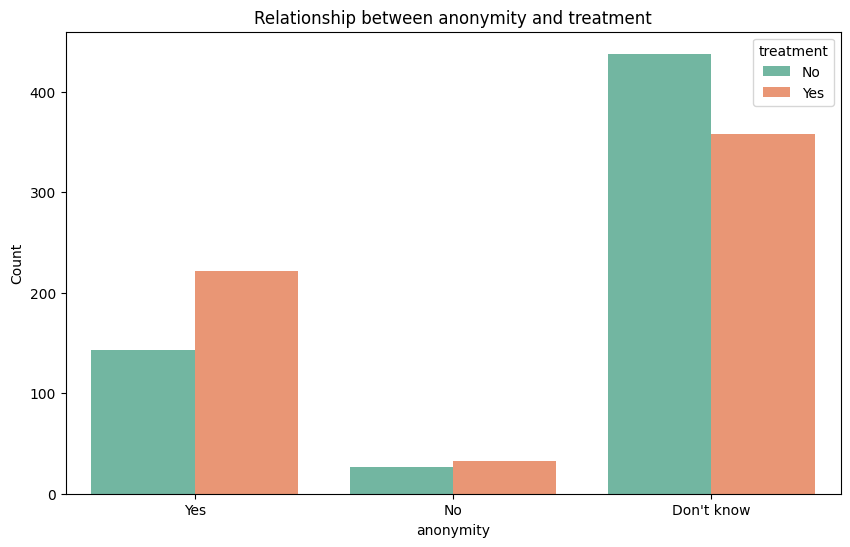

Chi-square test for anonymity and work_interfere
Chi2: 14.066253411627638, p-value: 0.028904769271873538




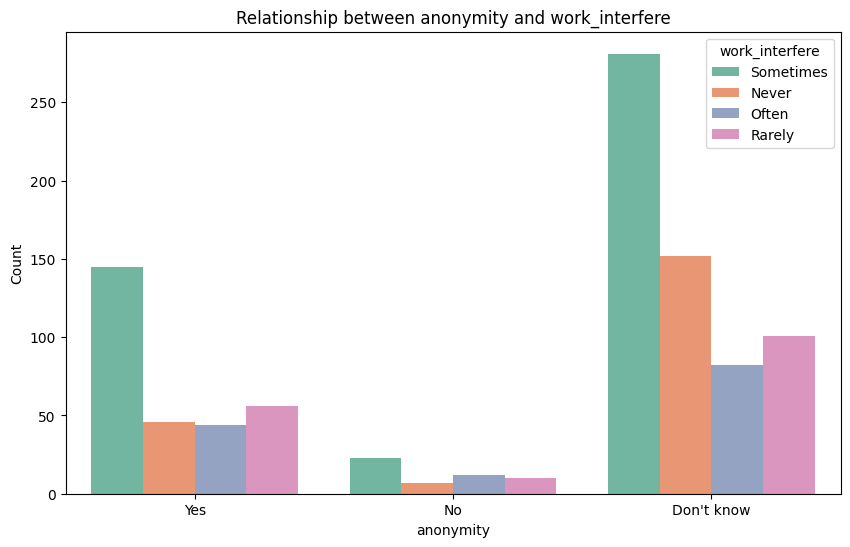

Chi-square test for leave and treatment
Chi2: 26.74762737834853, p-value: 2.2356227690089792e-05




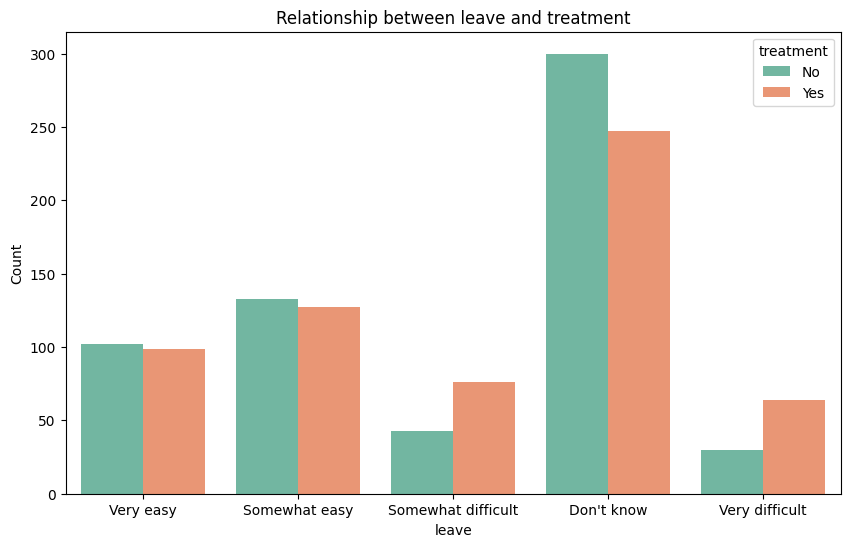

Chi-square test for leave and work_interfere
Chi2: 35.094732191378746, p-value: 0.0004523135823370256




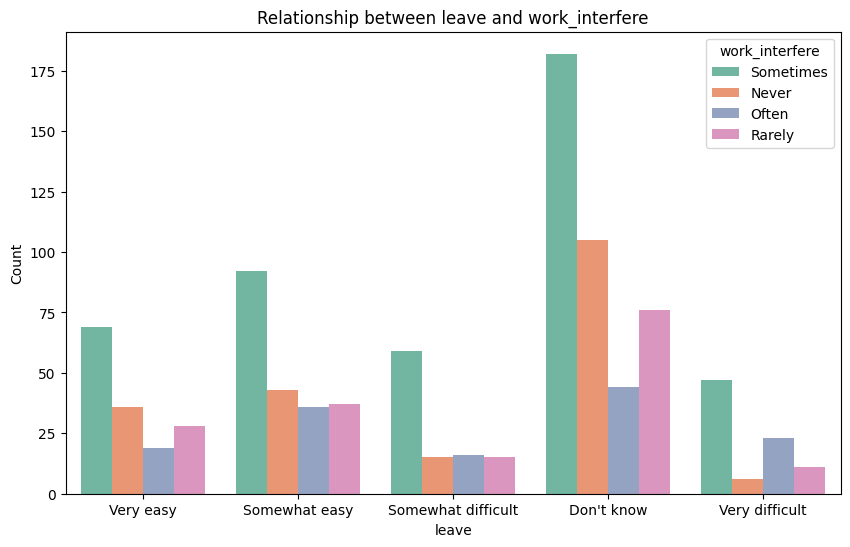

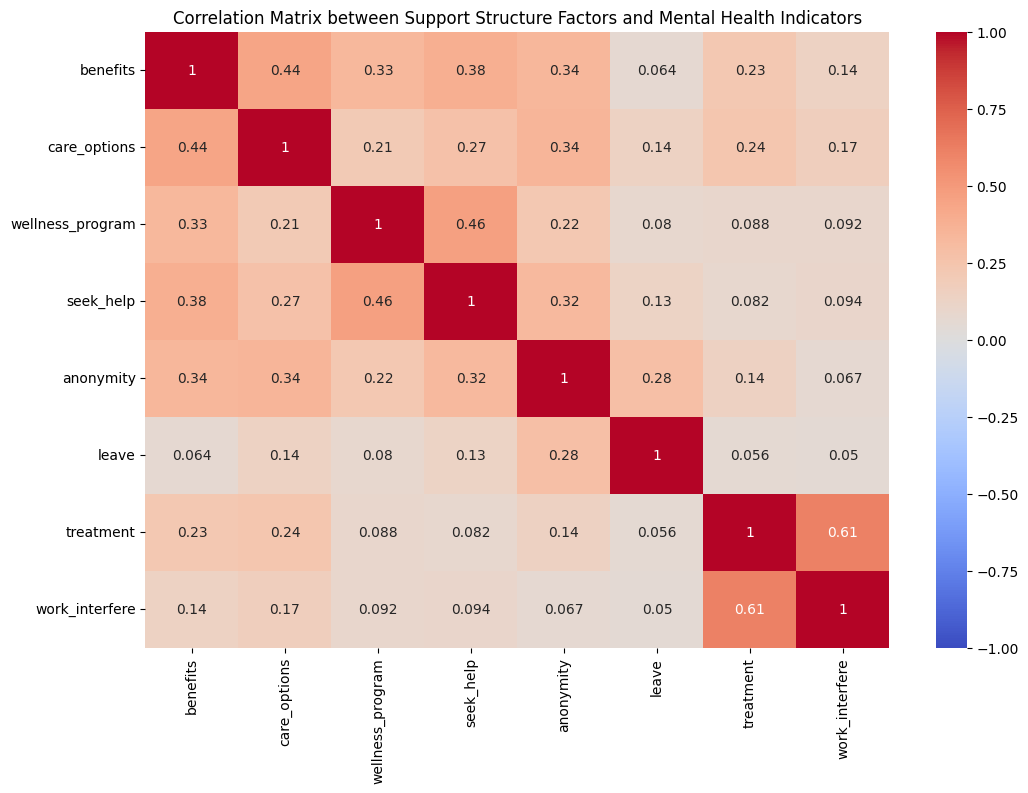

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Factors to analyze
support_structure_factors = [
    'benefits', 'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'leave'
]

# Mental health indicators
mental_health_indicators = ['treatment', 'work_interfere']

# Analyze the relationship between support structure factors and mental health indicators
for factor in support_structure_factors:
    for indicator in mental_health_indicators:
        if factor in data.columns and indicator in data.columns:
            contingency_table = pd.crosstab(data[factor], data[indicator])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f"Chi-square test for {factor} and {indicator}")
            print(f"Chi2: {chi2}, p-value: {p}")
            print("\n")

            plt.figure(figsize=(10, 6))
            sns.countplot(x=factor, hue=indicator, data=data, palette='Set2')
            plt.title(f'Relationship between {factor} and {indicator}')
            plt.xlabel(factor)
            plt.ylabel('Count')
            plt.legend(title=indicator)
            plt.show()

# Heatmap to visualize correlations between support structure factors and mental health indicators
# Encode categorical variables for correlation heatmap
encoded_data = data.copy()
for col in support_structure_factors + mental_health_indicators:
    if col in data.columns and data[col].dtype == 'object':
        encoded_data[col] = data[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = encoded_data[support_structure_factors + mental_health_indicators].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Support Structure Factors and Mental Health Indicators')
plt.show()
